<a href="https://colab.research.google.com/github/Andyfer004/Lab_6IA/blob/main/Lab6_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tasks 1 - Teoría


### 1. En un juego de suma cero para dos jugadores, ¿cómo funciona el algoritmo minimax para determinar la estrategia óptima para cada jugador? ¿Puede explicarnos el concepto de "valor minimax" y su importancia en este contexto?

El **algoritmo Minimax** se utiliza en juegos de suma cero de dos jugadores para encontrar la estrategia óptima maximizando la ganancia del jugador actual y minimizando la del oponente. Funciona de la siguiente manera:

1. Construye un árbol de juego con todas las posibles jugadas futuras.
2. Asigna valores a los nodos terminales según el resultado del juego.
3. Retrocede en el árbol aplicando:
   - **Maximización** en los turnos del jugador que busca ganar.
   - **Minimización** en los turnos del oponente.
4. La raíz del árbol recibe el **valor minimax**, que representa el mejor resultado posible considerando que el oponente juega óptimamente.

**Importancia del Valor Minimax:**
Es el valor óptimo que un jugador puede garantizarse asumiendo que el adversario jugará de la mejor forma posible.


### 2. Compare y contraste el algoritmo minimax con la poda alfa-beta. ¿Cómo mejora la poda alfa-beta la eficiencia del algoritmo minimax, particularmente en árboles de caza grandes? Proporcione un ejemplo para ilustrar la diferencia en la complejidad computacional entre la poda minimax y alfa-beta.

La **poda alfa-beta** es una optimización del algoritmo Minimax que reduce la cantidad de nodos evaluados sin alterar el resultado final. Se basa en los siguientes principios:

- **Alfa (α)**: Representa el mejor valor encontrado para el jugador Max hasta el momento.
- **Beta (β)**: Representa el mejor valor encontrado para el jugador Min hasta el momento.
- Si en algún nodo β ≤ α, no es necesario explorar más ramas, pues la jugada no será óptima.

**Ejemplo de complejidad computacional:**
- **Minimax sin poda:** Explora **O(b^d)** nodos (b = factor de ramificación, d = profundidad del árbol).
- **Minimax con poda alfa-beta:** En el mejor caso, reduce la complejidad a **O(b^(d/2))**, permitiendo evaluar el doble de profundidad en el mismo tiempo.


### 3. ¿Cuál es el papel de expectiminimax en juegos con incertidumbre, como aquellos que involucran nodos de azar o información oculta? ¿En qué se diferencia el expectiminimax del minimax en el manejo de resultados probabilísticos y cuáles son los desafíos clave que aborda?

El **expectiminimax** extiende minimax para juegos con **azar o información incompleta**, como dados o cartas ocultas. Funciona igual que minimax, pero introduce **nodos de azar**, donde se calcula un valor esperado en lugar de un valor mínimo o máximo:

- En los nodos del jugador, se selecciona la mejor acción.
- En los nodos del oponente, se selecciona la peor acción para el jugador.
- En los nodos de azar, se calcula la esperanza matemática ponderando los valores por sus probabilidades.

**Diferencias con Minimax:**
- En minimax, el resultado depende solo de los jugadores.
- En expectiminimax, se consideran distribuciones de probabilidad.

**Desafíos:**
- Mayor costo computacional debido a la expansión del árbol con nodos de azar.
- Requiere conocer o estimar correctamente las probabilidades de cada evento aleatorio.




# Connect Four: Modo Humano vs IA

Este modo permite a un jugador humano enfrentarse contra una IA basada en el algoritmo Minimax con la opción de usar alpha-beta pruning.  
El humano selecciona una columna haciendo clic en un botón, y la IA responde automáticamente.  
El juego continúa hasta que uno de los dos gana o se produce un empate.


# Connect Four: Modo Humano vs IA


In [4]:
import math
import random
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import time

# ---------------------------
# Funciones básicas del tablero
# ---------------------------
def create_board():
    return [[0 for _ in range(7)] for _ in range(6)]

def drop_piece(board, row, col, piece):
    board[row][col] = piece

def is_valid_location(board, col):
    return board[0][col] == 0

def get_next_open_row(board, col):
    for r in range(5, -1, -1):
        if board[r][col] == 0:
            return r

def winning_move(board, piece):
    # Horizontal
    for r in range(6):
        for c in range(7-3):
            if board[r][c]==piece and board[r][c+1]==piece and board[r][c+2]==piece and board[r][c+3]==piece:
                return True
    # Vertical
    for c in range(7):
        for r in range(6-3):
            if board[r][c]==piece and board[r+1][c]==piece and board[r+2][c]==piece and board[r+3][c]==piece:
                return True
    # Diagonal positiva
    for r in range(6-3):
        for c in range(7-3):
            if board[r][c]==piece and board[r+1][c+1]==piece and board[r+2][c+2]==piece and board[r+3][c+3]==piece:
                return True
    # Diagonal negativa
    for r in range(3, 6):
        for c in range(7-3):
            if board[r][c]==piece and board[r-1][c+1]==piece and board[r-2][c+2]==piece and board[r-3][c+3]==piece:
                return True
    return False

# ---------------------------
# Funciones de evaluación y algoritmo Minimax
# ---------------------------
def evaluate_window(window, piece):
    score = 0
    opp_piece = 1 if piece == 2 else 2
    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(0) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(0) == 2:
        score += 2
    if window.count(opp_piece) == 3 and window.count(0) == 1:
        score -= 4
    return score

def score_position(board, piece):
    score = 0
    center_array = [board[r][7//2] for r in range(6)]
    score += center_array.count(piece) * 3
    # Horizontal
    for r in range(6):
        row_array = board[r]
        for c in range(7-3):
            window = row_array[c:c+4]
            score += evaluate_window(window, piece)
    # Vertical
    for c in range(7):
        col_array = [board[r][c] for r in range(6)]
        for r in range(6-3):
            window = col_array[r:r+4]
            score += evaluate_window(window, piece)
    # Diagonal positiva
    for r in range(6-3):
        for c in range(7-3):
            window = [board[r+i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)
    # Diagonal negativa
    for r in range(3, 6):
        for c in range(7-3):
            window = [board[r-i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)
    return score

def minimax(board, depth, alpha, beta, maximizingPlayer, piece, use_pruning=True):
    valid_locations = [c for c in range(7) if is_valid_location(board, c)]
    terminal = winning_move(board, 1) or winning_move(board, 2) or len(valid_locations)==0
    if depth == 0 or terminal:
        if terminal:
            if winning_move(board, piece):
                return (None, 100000000000000)
            elif winning_move(board, 1 if piece==2 else 2):
                return (None, -10000000000000)
            else:
                return (None, 0)
        else:
            return (None, score_position(board, piece))

    if maximizingPlayer:
        value = -math.inf
        best_col = random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            temp_board = [r.copy() for r in board]
            drop_piece(temp_board, row, col, piece)
            new_score = minimax(temp_board, depth-1, alpha, beta, False, piece, use_pruning)[1]
            if new_score > value:
                value = new_score
                best_col = col
            if use_pruning:
                alpha = max(alpha, value)
                if alpha >= beta:
                    break
        return best_col, value
    else:
        value = math.inf
        best_col = random.choice(valid_locations)
        opp_piece = 1 if piece==2 else 2
        for col in valid_locations:
            row = get_next_open_row(board, col)
            temp_board = [r.copy() for r in board]
            drop_piece(temp_board, row, col, opp_piece)
            new_score = minimax(temp_board, depth-1, alpha, beta, True, piece, use_pruning)[1]
            if new_score < value:
                value = new_score
                best_col = col
            if use_pruning:
                beta = min(beta, value)
                if alpha >= beta:
                    break
        return best_col, value

# ---------------------------
# Configuración inicial y widget de salida para el tablero
# ---------------------------
board = create_board()
current_turn = 0  # 0: jugador, 1: IA
game_over = False

board_out = widgets.Output()

def draw_board_widget(board):
    with board_out:
        board_out.clear_output(wait=True)
        plt.figure(figsize=(7,6))
        ax = plt.gca()
        ax.clear()
        # Dibujar el fondo (tablero azul)
        for c in range(7):
            for r in range(6):
                circle = plt.Circle((c, 5-r), 0.45, color="blue")
                ax.add_patch(circle)
        # Dibujar las fichas
        for r in range(6):
            for c in range(7):
                piece = board[r][c]
                if piece == 0:
                    color = "white"
                elif piece == 1:
                    color = "red"
                elif piece == 2:
                    color = "yellow"
                circle = plt.Circle((c, 5-r), 0.4, color=color)
                ax.add_patch(circle)
        ax.set_xlim(-0.5,6.5)
        ax.set_ylim(-0.5,5.5)
        ax.set_aspect('equal')
        ax.axis('off')
        plt.show()

# ---------------------------
# Callback de los botones para el turno del jugador
# ---------------------------
def on_button_click(b):
    global board, current_turn, game_over
    if game_over or current_turn != 0:
        return
    col = int(b.description)
    if not is_valid_location(board, col):
        print("Movimiento inválido, columna llena. Elige otra columna.")
        return
    row = get_next_open_row(board, col)
    drop_piece(board, row, col, 1)
    draw_board_widget(board)
    if winning_move(board, 1):
        print("¡Ganaste, jugador!")
        game_over = True
        return
    # Turno de la IA
    current_turn = 1
    time.sleep(0.5)  # Pausa para efecto visual
    col_ai, _ = minimax(board, depth=4, alpha=-math.inf, beta=math.inf, maximizingPlayer=True, piece=2, use_pruning=True)
    if is_valid_location(board, col_ai):
        row_ai = get_next_open_row(board, col_ai)
        drop_piece(board, row_ai, col_ai, 2)
    draw_board_widget(board)
    if winning_move(board, 2):
        print("¡La IA gana!")
        game_over = True
        return
    current_turn = 0

# ---------------------------
# Crear y mostrar los botones y el área de salida del tablero
# ---------------------------
buttons = [widgets.Button(description=str(i)) for i in range(7)]
for button in buttons:
    button.on_click(on_button_click)

display(widgets.HBox(buttons))
display(board_out)
draw_board_widget(board)

Output()

¡La IA gana!


# Connect Four: Modo IA vs IA

Este modo enfrenta dos instancias de IA entre sí.  
- **IA 1 (sin alpha-beta pruning)** usa el algoritmo Minimax sin optimización.  
- **IA 2 (con alpha-beta pruning)** usa el mismo algoritmo, pero con la optimización de poda alfa-beta para mejorar la eficiencia.  

El turno inicial y los roles de cada IA se asignan aleatoriamente para garantizar una comparación justa.  
El tablero se actualiza de manera visual en cada jugada, permitiendo observar el desarrollo del juego hasta que uno gana o hay empate.

In [10]:
import math
import random
import time
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# ---------------------------
# Funciones básicas del tablero
# ---------------------------
def create_board():
    return [[0 for _ in range(7)] for _ in range(6)]

def drop_piece(board, row, col, piece):
    board[row][col] = piece

def is_valid_location(board, col):
    return board[0][col] == 0

def get_next_open_row(board, col):
    for r in range(5, -1, -1):
        if board[r][col] == 0:
            return r

def winning_move(board, piece):
    # Horizontal
    for r in range(6):
        for c in range(7 - 3):
            if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
                return True
    # Vertical
    for c in range(7):
        for r in range(6 - 3):
            if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
                return True
    # Diagonal positiva
    for r in range(6 - 3):
        for c in range(7 - 3):
            if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
                return True
    # Diagonal negativa
    for r in range(3, 6):
        for c in range(7 - 3):
            if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
                return True
    return False

# ---------------------------
# Funciones de evaluación y algoritmo Minimax
# ---------------------------
def evaluate_window(window, piece):
    score = 0
    opp_piece = 1 if piece == 2 else 2
    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(0) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(0) == 2:
        score += 2
    if window.count(opp_piece) == 3 and window.count(0) == 1:
        score -= 4
    return score

def score_position(board, piece):
    score = 0
    center_array = [board[r][3] for r in range(6)]
    score += center_array.count(piece) * 3
    # Horizontal
    for r in range(6):
        row_array = board[r]
        for c in range(7 - 3):
            window = row_array[c:c+4]
            score += evaluate_window(window, piece)
    # Vertical
    for c in range(7):
        col_array = [board[r][c] for r in range(6)]
        for r in range(6 - 3):
            window = col_array[r:r+4]
            score += evaluate_window(window, piece)
    # Diagonal positiva
    for r in range(6 - 3):
        for c in range(7 - 3):
            window = [board[r+i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)
    # Diagonal negativa
    for r in range(3, 6):
        for c in range(7 - 3):
            window = [board[r-i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)
    return score

def minimax(board, depth, alpha, beta, maximizingPlayer, piece, use_pruning=True):
    valid_locations = [c for c in range(7) if is_valid_location(board, c)]
    terminal = winning_move(board, 1) or winning_move(board, 2) or len(valid_locations) == 0
    if depth == 0 or terminal:
        if terminal:
            if winning_move(board, piece):
                return (None, 100000000000000)
            elif winning_move(board, 1 if piece == 2 else 2):
                return (None, -10000000000000)
            else:
                return (None, 0)
        else:
            return (None, score_position(board, piece))

    if maximizingPlayer:
        value = -math.inf
        best_col = random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            board_copy = [r[:] for r in board]
            drop_piece(board_copy, row, col, piece)
            new_score = minimax(board_copy, depth - 1, alpha, beta, False, piece, use_pruning)[1]
            if new_score > value:
                value = new_score
                best_col = col
            if use_pruning:
                alpha = max(alpha, value)
                if alpha >= beta:
                    break
        return best_col, value
    else:
        value = math.inf
        best_col = random.choice(valid_locations)
        opp_piece = 1 if piece == 2 else 2
        for col in valid_locations:
            row = get_next_open_row(board, col)
            board_copy = [r[:] for r in board]
            drop_piece(board_copy, row, col, opp_piece)
            new_score = minimax(board_copy, depth - 1, alpha, beta, True, piece, use_pruning)[1]
            if new_score < value:
                value = new_score
                best_col = col
            if use_pruning:
                beta = min(beta, value)
                if alpha >= beta:
                    break
        return best_col, value

# ---------------------------
# Widget para mostrar el tablero
# ---------------------------
board_out = widgets.Output()

def draw_board_widget(board, message=""):
    with board_out:
        board_out.clear_output(wait=True)
        if message:
            print(message)
        plt.figure(figsize=(7,6))
        ax = plt.gca()
        ax.clear()
        # Dibujar fondo azul
        for c in range(7):
            for r in range(6):
                circle = plt.Circle((c, 5-r), 0.45, color="blue")
                ax.add_patch(circle)
        # Dibujar fichas
        for r in range(6):
            for c in range(7):
                piece = board[r][c]
                if piece == 0:
                    color = "white"
                elif piece == 1:
                    color = "red"
                elif piece == 2:
                    color = "yellow"
                circle = plt.Circle((c, 5-r), 0.4, color=color)
                ax.add_patch(circle)
        ax.set_xlim(-0.5, 6.5)
        ax.set_ylim(-0.5, 5.5)
        ax.set_aspect('equal')
        ax.axis('off')
        plt.show()

# ---------------------------
# Juego IA vs IA interactivo con asignación aleatoria de roles y turno inicial
# ---------------------------
def play_game_ai_vs_ai_interactive(depth=4, pause=0.8):
    board = create_board()
    game_over = False

    # Asignación aleatoria de roles:
    # Se asigna aleatoriamente qué agente usa pruning y qué ficha tiene.
    if random.random() < 0.5:
        non_pruning_piece = 1
        pruning_piece = 2
    else:
        non_pruning_piece = 2
        pruning_piece = 1

    non_pruning_label = "IA sin pruning"
    pruning_label = "IA con pruning"

    # Randomizar quién inicia: 0 para el agente sin pruning y 1 para el agente con pruning
    turn = random.choice([0, 1])

    draw_board_widget(board, message=f"Inicio del juego IA vs IA\n{non_pruning_label} (ficha {non_pruning_piece}) vs {pruning_label} (ficha {pruning_piece})\nEmpieza: {'sin pruning' if turn==0 else 'con pruning'}")
    time.sleep(pause)

    while not game_over:
        if turn == 0:
            col, _ = minimax(board, depth, -math.inf, math.inf, True, non_pruning_piece, use_pruning=False)
            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                drop_piece(board, row, col, non_pruning_piece)
                draw_board_widget(board, message=f"{non_pruning_label} (ficha {non_pruning_piece}) juega en la columna {col}")
                if winning_move(board, non_pruning_piece):
                    draw_board_widget(board, message=f"¡{non_pruning_label} gana!")
                    game_over = True
                    break
        else:
            col, _ = minimax(board, depth, -math.inf, math.inf, True, pruning_piece, use_pruning=True)
            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                drop_piece(board, row, col, pruning_piece)
                draw_board_widget(board, message=f"{pruning_label} (ficha {pruning_piece}) juega en la columna {col}")
                if winning_move(board, pruning_piece):
                    draw_board_widget(board, message=f"¡{pruning_label} gana!")
                    game_over = True
                    break
        time.sleep(pause)
        if not any(is_valid_location(board, c) for c in range(7)):
            draw_board_widget(board, message="¡Empate!")
            game_over = True
            break
        turn = (turn + 1) % 2

# ---------------------------
# Mostrar el widget de salida y ejecutar el juego
# ---------------------------
display(board_out)
play_game_ai_vs_ai_interactive(depth=4, pause=0.8)

Output()

##Gráfica comparativa de la eficiencia entre Minimax con y sin alpha-beta pruning

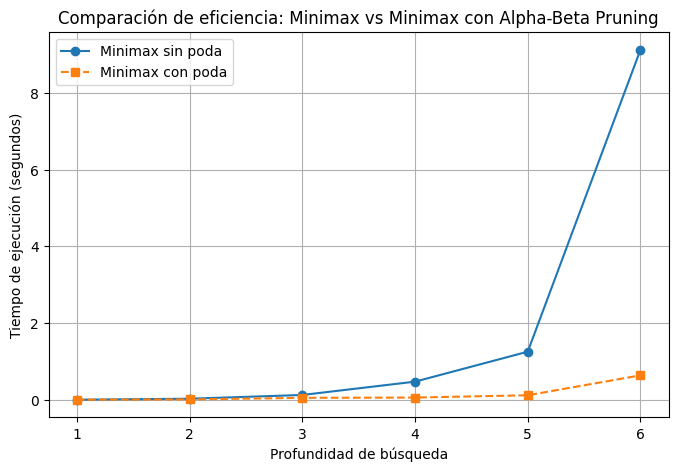

In [11]:
import time
import matplotlib.pyplot as plt

# Rango de profundidades a evaluar
depth_range = list(range(1, 7))  # De 1 a 6 niveles de profundidad
times_no_pruning = []
times_with_pruning = []

# Tablero de prueba con algunos movimientos
test_board = create_board()
drop_piece(test_board, get_next_open_row(test_board, 3), 3, 1)
drop_piece(test_board, get_next_open_row(test_board, 4), 4, 2)
drop_piece(test_board, get_next_open_row(test_board, 2), 2, 1)

# Evaluamos el tiempo de ejecución de Minimax con y sin poda para cada profundidad
for depth in depth_range:
    # Medición sin pruning
    start_time = time.time()
    minimax(test_board, depth, -math.inf, math.inf, True, 1, use_pruning=False)
    times_no_pruning.append(time.time() - start_time)

    # Medición con pruning
    start_time = time.time()
    minimax(test_board, depth, -math.inf, math.inf, True, 1, use_pruning=True)
    times_with_pruning.append(time.time() - start_time)

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(depth_range, times_no_pruning, marker='o', linestyle='-', label="Minimax sin poda")
plt.plot(depth_range, times_with_pruning, marker='s', linestyle='--', label="Minimax con poda")
plt.xlabel("Profundidad de búsqueda")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Comparación de eficiencia: Minimax vs Minimax con Alpha-Beta Pruning")
plt.legend()
plt.grid()
plt.show()

# Explicación del Agente de Connect Four

## ¿Qué hace nuestro agente?  
Nuestro agente es una Inteligencia Artificial (IA) que juega **Connect Four** utilizando el algoritmo **Minimax**.  
Este algoritmo evalúa todas las posibles jugadas futuras hasta cierta profundidad y elige la mejor opción para maximizar su probabilidad de ganar.  

Para mejorar la eficiencia del cálculo, implementamos la técnica **alpha-beta pruning**, que permite a la IA **descartar jugadas irrelevantes** y reducir el número de nodos explorados sin afectar la decisión final.  

### Características principales:
 Evalúa el tablero usando heurísticas como control del centro y detección de alineaciones.  
 Tiene dos modos de juego: **Humano vs IA** y **IA vs IA**.  
 En el modo **IA vs IA**, un agente usa Minimax sin poda y otro con poda alfa-beta.  
 El turno inicial y las fichas se asignan aleatoriamente para evitar sesgos en los resultados.  


## ¿Por qué ganó la IA con o sin alpha-beta pruning?   
En el modo **IA vs IA**, la poda alfa-beta **no mejora la calidad de las jugadas**, solo **hace que la IA tome decisiones más rápido** al evitar evaluar ramas innecesarias.  
Debido a esto, el ganador **no se determina por tener o no la optimización**, sino por **quién tiene la ventaja del primer movimiento**.  

### ¿Cómo afectó la estrategia de poda al juego?  
 **La IA con alpha-beta pruning** realiza los mismos movimientos que la IA sin poda, pero **más eficientemente**.  
 **El resultado depende principalmente de quién empieza**, ya que el primer jugador tiene más oportunidades de ganar en Connect Four.  
 **Ambas IAs toman las mismas decisiones**, ya que Minimax evalúa todas las posibilidades dentro de la profundidad permitida.  

